In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib
import tensorflow as tf
from utils import GAESMLP, splitDataset, scatter_data


### Data loading & splitting

In [20]:
classes = pd.read_csv("classes.csv", header=None)
moons = pd.read_csv("moons.csv", header=None)
circles = pd.read_csv("circles.csv", header=None)

In [21]:
df_classes = splitDataset(classes.iloc[:,:-1].values, classes.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_moons = splitDataset(moons.iloc[:,:-1].values, moons.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_circles = splitDataset(circles.iloc[:,:-1].values, circles.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])

### Data Visualization

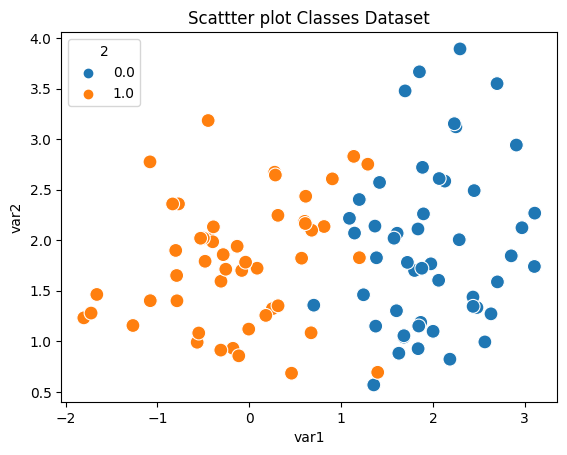

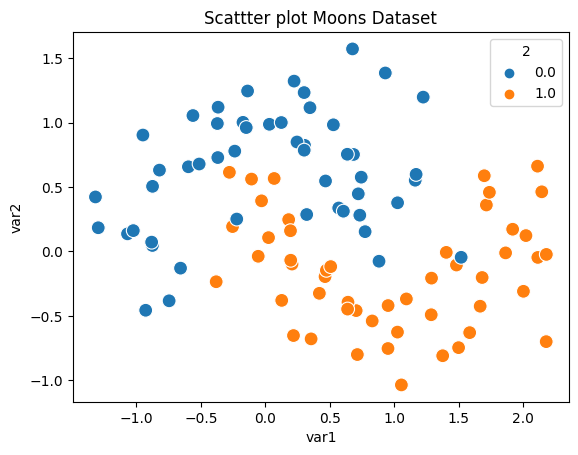

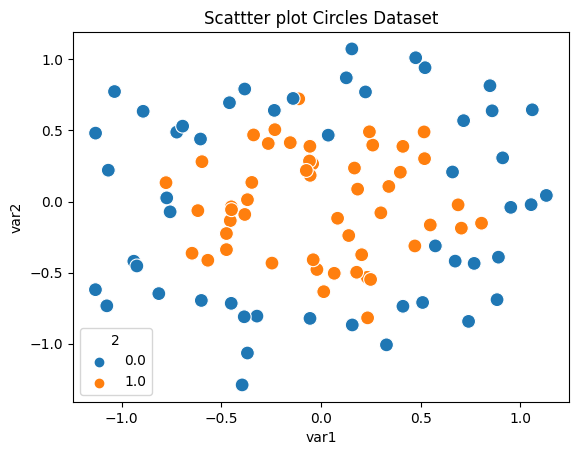

In [22]:
#Plotting the syntetic initial datasets, with an increasing complexity
scatter_data(classes, var1='var1', var2='var2', datasetName='Classes')
scatter_data(moons, var1='var1', var2='var2', datasetName='Moons')
scatter_data(circles, var1='var1', var2='var2', datasetName='Circles')

## Experiments

In [23]:
# fixing the MLP architecture
model = [2,4,4,1]

### MLP + Evolutionary Strategy

iter 10. reward: 1.712498
iter 20. reward: 1.228169
iter 30. reward: 4.714326
iter 40. reward: 3.534372
iter 50. reward: 5.197529
iter 60. reward: 4.234505
iter 70. reward: 3.457289
iter 80. reward: 3.618761
iter 90. reward: 2.706239
iter 100. reward: 5.162966
Validation loss: 7.6781965719971375    Validation acc:  1.0
313/313 [==============================] - 0s 1ms/step


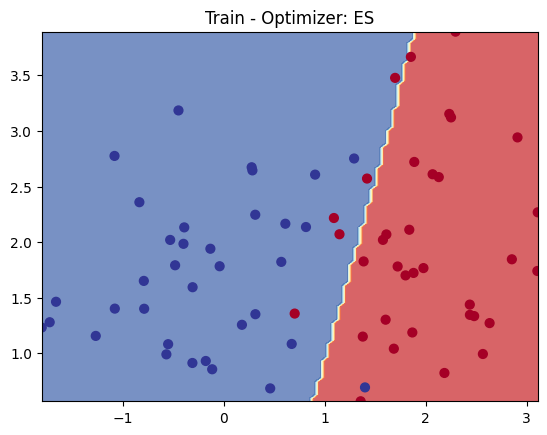

313/313 [==============================] - 0s 1ms/step


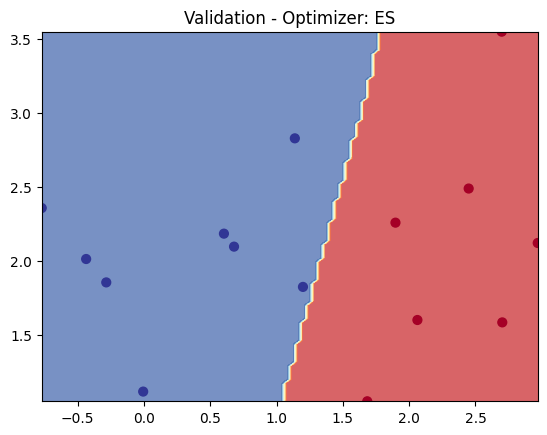

0.8666666666666667

In [24]:
# Classes Dataset
es = GAESMLP(model, 'ES' ,40, 0.2, 0.3, 0.995, 1)
es.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_classes['X_test'], df_classes['y_test'])

In [26]:
# Moons datset
es = GAESMLP(model, 'ES' ,40, 0.2, 0.3, 0.995, 1)
es.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], verbose = True)
es.evaluate(df_moons['X_test'], df_moons['y_test'])

NameError: name 'iteration' is not defined

In [ ]:
# Circles dataset
es = GAESMLP(model, 'ES' ,40, 0.2, 0.3, 0.995, 1)
es.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_circles['X_test'], df_circles['y_test'])

### MLP + Genetic Algorithm

In [27]:
# Classes dataset
mlp = GAESMLP(model, 'GA', 10, 250, 5, 0.995, 1)
mlp.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
mlp.evaluate(df_classes['X_test'], df_classes['y_test'])

Generation = 1
Fitness    = 2.609695689338941
Generation = 2
Fitness    = 2.754600546242686
Generation = 3
Fitness    = 3.4219277188282735
Generation = 4
Fitness    = 3.4219277188282735
Generation = 5
Fitness    = 3.4219277188282735
Generation = 6
Fitness    = 3.4219277188282735
Generation = 7
Fitness    = 3.4219277188282735
Generation = 8
Fitness    = 4.229055558036776
Generation = 9
Fitness    = 4.229055558036776
Generation = 10
Fitness    = 4.229055558036776
Generation = 11
Fitness    = 5.191318979916333
Generation = 12
Fitness    = 5.191318979916333
Generation = 13
Fitness    = 5.561151351734461
Generation = 14
Fitness    = 5.561151351734461
Generation = 15
Fitness    = 5.561151351734461
Generation = 16
Fitness    = 6.8158943371083
Generation = 17
Fitness    = 6.8158943371083
Generation = 18
Fitness    = 6.8158943371083
Generation = 19
Fitness    = 6.8158943371083
Generation = 20
Fitness    = 6.8158943371083
Generation = 21
Fitness    = 6.8158943371083
Generation = 22
Fitness    = 

0.9333333333333333

In [ ]:
# Moons dataset
mlp = GAESMLP(model, 'GA', 10, 250, 5, 0.995, 1)
mlp.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], verbose = True)
mlp.evaluate(df_moons['X_test'], df_moons['y_test'])

In [ ]:
# Circles dataset
mlp = GAESMLP(model, 'GA', 10, 250, 5, 0.995, 1)
mlp.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], verbose = True)
mlp.evaluate(df_circles['X_test'], df_circles['y_test'])

### MLP + Backpropagation

In [35]:
# Classes dataset
bp = GAESMLP(model, 'BP' , 0.5, 0.9, True)
bp.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
bp.evaluate(df_classes['X_test'], df_classes['y_test'])

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.1143
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7357 - accuracy: 0.1143
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7334 - accuracy: 0.1143
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.1286
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7280 - accuracy: 0.1286
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7259 - accuracy: 0.1571
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7243 - accuracy: 0.1571
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7224 - accuracy: 0.1714
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.1714
Epoch 11/100
3/3 [===========

0.5333333333333333

In [ ]:
# Moons dataset
bp = GAESMLP(model, 'BP' , 0.5, 0.9, True)
bp.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], verbose = True)
bp.evaluate(df_moons['X_test'], df_moons['y_test'])

In [ ]:
# Circles dataset
bp = GAESMLP(model, 'BP' , 0.5, 0.9, True)
bp.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], verbose = True)
bp.evaluate(df_circles['X_test'], df_circles['y_test'])

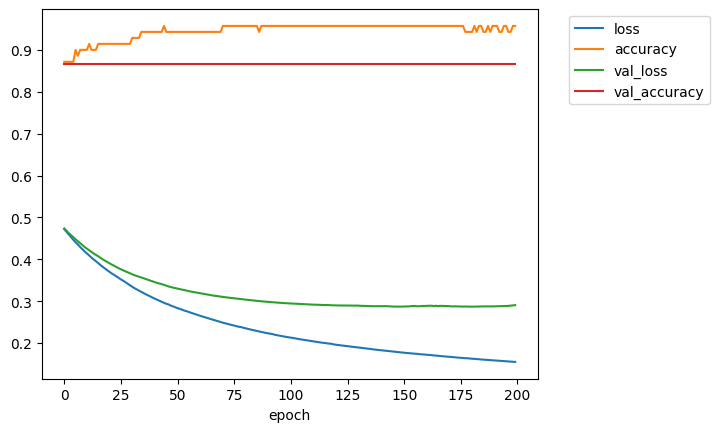

In [216]:
# Train the model
history = model.fit(
    df_classes['X_train'], df_classes['y_train'], epochs=200,
    validation_data = (df_classes['X_val'], df_classes['y_val']),
    verbose=0
)
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Generation = 1
Fitness    = 1.879929828725446
Generation = 2
Fitness    = 1.879929828725446
Generation = 3
Fitness    = 1.985725926575419
Generation = 4
Fitness    = 2.1899537060657996
Generation = 5
Fitness    = 2.1899537060657996
Generation = 6
Fitness    = 2.2815831561862607
Generation = 7
Fitness    = 2.2815831561862607
Generation = 8
Fitness    = 2.434226257183226
Generation = 9
Fitness    = 2.719689564111486
Generation = 10
Fitness    = 2.719689564111486
Generation = 11
Fitness    = 2.719689564111486
Generation = 12
Fitness    = 2.86387793135675
Generation = 13
Fitness    = 3.308960466812167
Generation = 14
Fitness    = 3.308960466812167
Generation = 15
Fitness    = 3.308960466812167
Generation = 16
Fitness    = 3.308960466812167
Generation = 17
Fitness    = 3.308960466812167
Generation = 18
Fitness    = 3.62576527133244
Generation = 19
Fitness    = 3.6442225713651255
Generation = 20
Fitness    = 3.6442225713651255
Generation = 21
Fitness    = 3.9229572928404277
Generation = 22
F

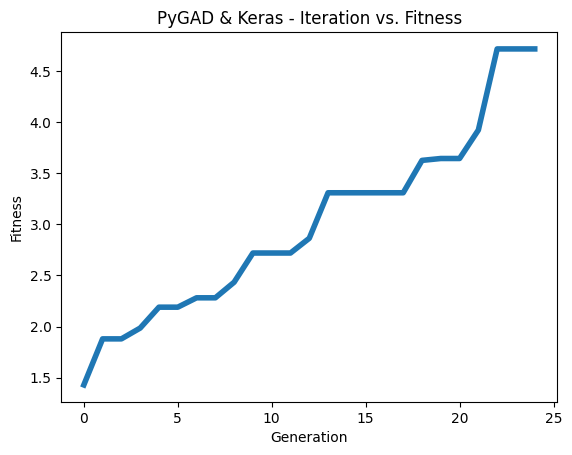

Fitness value of the best solution = 4.716069711812342
Index of the best solution : 0
3/3 [==============================] - 0s 2ms/step
Predictions : 
 [[0.11114053]
 [0.13216057]
 [0.99455035]
 [0.9578125 ]
 [0.33929878]
 [0.99570674]
 [0.06145426]
 [0.08133158]
 [0.10221095]
 [0.30025616]
 [0.11432654]
 [0.2260774 ]
 [0.08921056]
 [0.91087484]
 [0.9779997 ]
 [0.42407528]
 [0.03708018]
 [0.22564065]
 [0.34991625]
 [0.88306034]
 [0.38039348]
 [0.07861456]
 [0.13186471]
 [0.46310845]
 [0.9744136 ]
 [0.09918534]
 [0.05309867]
 [0.27001858]
 [0.0713077 ]
 [0.8466649 ]
 [0.09064975]
 [0.11705757]
 [0.1030877 ]
 [0.99398935]
 [0.03978785]
 [0.46793652]
 [0.9826837 ]
 [0.20394066]
 [0.66054475]
 [0.15190269]
 [0.9973183 ]
 [0.33113045]
 [0.9997015 ]
 [0.12186969]
 [0.97940224]
 [0.06048061]
 [0.07840165]
 [0.09717675]
 [0.43708435]
 [0.9753724 ]
 [0.99851716]
 [0.978259  ]
 [0.9997828 ]
 [0.7538115 ]
 [0.04695921]
 [0.977881  ]
 [0.9930152 ]
 [0.9322648 ]
 [0.8065019 ]
 [0.5       ]
 [0.984

In [14]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
import tensorflow as tf

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs, verbose=0)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = df_classes['X_train']

# Data outputs
data_outputs = df_classes['y_train']

num_generations = 25
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

bce = tensorflow.keras.losses.BinaryCrossentropy()
abs_error = bce(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

In [17]:
ga_instance.best_solutions_fitness

[1.4294680107862707,
 1.879929828725446,
 1.879929828725446,
 1.985725926575419,
 2.1899537060657996,
 2.1899537060657996,
 2.2815831561862607,
 2.2815831561862607,
 2.434226257183226,
 2.719689564111486,
 2.719689564111486,
 2.719689564111486,
 2.86387793135675,
 3.308960466812167,
 3.308960466812167,
 3.308960466812167,
 3.308960466812167,
 3.308960466812167,
 3.62576527133244,
 3.6442225713651255,
 3.6442225713651255,
 3.9229572928404277,
 4.716069711812342,
 4.716069711812342,
 4.716069711812342]

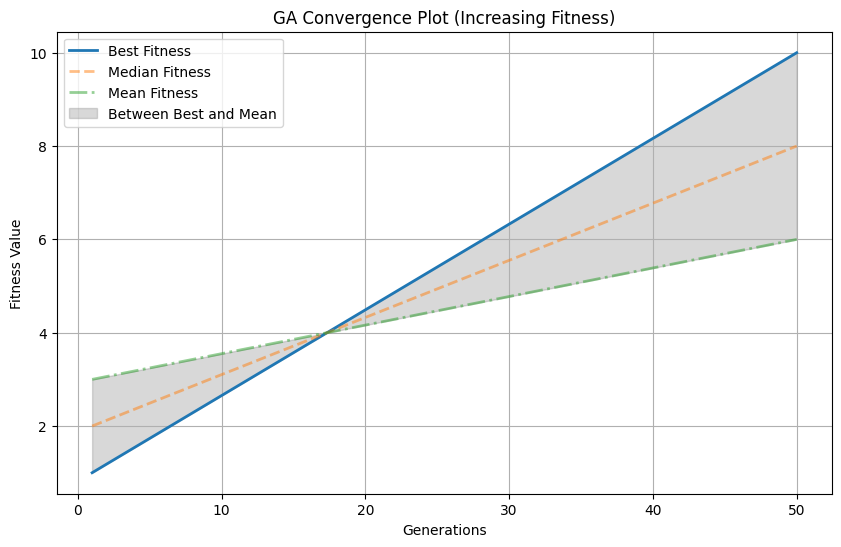

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generating sample data with increasing fitness values
generations = np.arange(1, 51)  # assuming 50 generations

# Increasing fitness values for illustration
best_fitness_values = np.linspace(1, 10, num=50)  # increasing from 1 to 10
median_fitness_values = np.linspace(2, 8, num=50)   # increasing from 2 to 8
mean_fitness_values = np.linspace(3, 6, num=50)     # increasing from 3 to 6

# Plotting the convergence
plt.figure(figsize=(10, 6))

# Plotting the best fitness
plt.plot(generations, best_fitness_values, label='Best Fitness', linewidth=2)

# Plotting the median fitness
plt.plot(generations, median_fitness_values, label='Median Fitness', linestyle='--', linewidth=2, alpha=0.5)

# Plotting the mean fitness
plt.plot(generations, mean_fitness_values, label='Mean Fitness', linestyle='-.', linewidth=2, alpha=0.5)

# Shading the area between best and mean fitness
plt.fill_between(generations, best_fitness_values, mean_fitness_values, color='gray', alpha=0.3, label='Between Best and Mean')

# Adding labels and title
plt.xlabel('Generations')
plt.ylabel('Fitness Value')
plt.title('GA Convergence Plot (Increasing Fitness)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7198 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.5000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.5000
Epoch 11/100
3/3 [===========

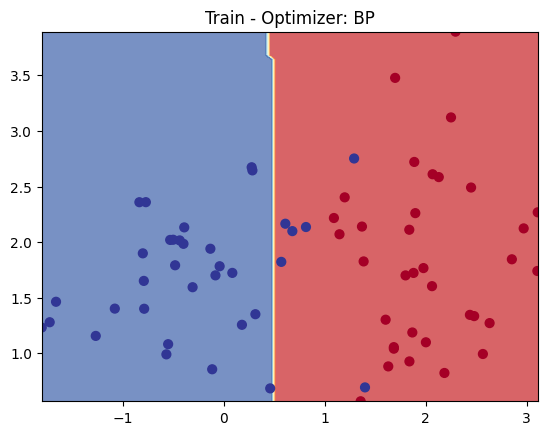

313/313 [==============================] - 0s 1ms/step


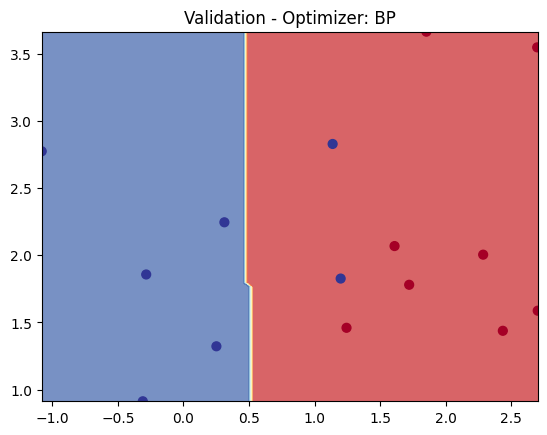

313/313 [==============================] - 0s 1ms/step


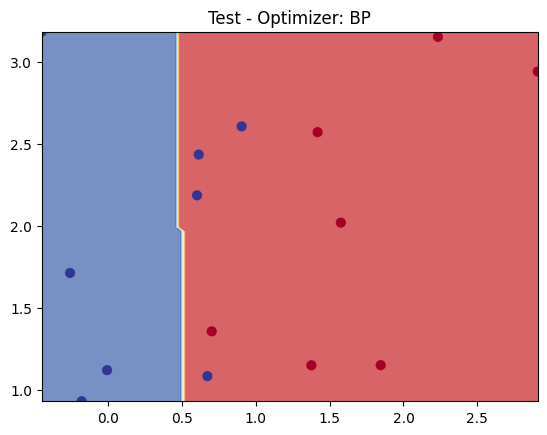

0.7333333333333333

In [10]:
# Classes dataset
es = GAESMLP(model, 'BP' , 0.5, 0.9, True)
es.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_classes['X_test'], df_classes['y_test'], 'Test')

In [44]:
ES=es.model